# Monte Carlo simulation MAMR1C 3T

<img src="MAMR1C 3T.PNG" ALIGN="left" width="600" height="700"> 

In [3]:
__author__ ='Sung Chung'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime

pd.set_option('display.max_column',500)

### input 
V0=100
V_RT=50

T0=0
PCM_FACTOR =1.0
num_samples=10000

RT_dTdW=108*PCM_FACTOR                             #RTG dT / dW slope   
RS_dTdW=62*PCM_FACTOR                             #RSG dT / dW slope 

fname="MAMR1C_3T_" + "_" + str(V0) +"mV"
# 2.5% sigma for all resistor
RT, RT_sigma = 11.37,0.28  
RT0, RT0_sigma = 1.2, 0.03 
RLT, RLT_sigma = 0.78, 0.02   
RS, RS_sigma = 2.5, 0.0625 
RS0, RS0_sigma =1, 0.025  
RLS, RLS_sigma = 0.67, 0.017 
RL0,RL0_sigma=0.5,0.013
RM0,RM0_sigma=3.08,0.08  



def getSTOR(TG_R,SG_R,RL):
    TG_SG_resistance =  (TG_R)*(SG_R)/(TG_R+SG_R)
    STOR= (RL+TG_SG_resistance)
    return (TG_SG_resistance, STOR)

#normal distribution b 
RT_n=np.random.normal(RT,RT_sigma,num_samples)
RT0_n=np.random.normal(RT0,RT0_sigma,num_samples)
RLT_n=np.random.normal(RLT,RLT_sigma,num_samples)
RS_n=np.random.normal(RS,RS_sigma,num_samples)
RS0_n=np.random.normal(RS0,RS0_sigma,num_samples)
RLS_n=np.random.normal(RLS,RLS_sigma,num_samples)
RL0_n=np.random.normal(RL0,RL0_sigma,num_samples)
RM0_n=np.random.normal(RM0,RM0_sigma,num_samples)


df=pd.DataFrame({'RT':RT_n,'RT0':RT0_n,'RLT':RLT_n,'RS':RS_n,'RS0':RS0_n, 'RLS':RLS_n,'RL0':RL0_n,'RM0':RM0_n})

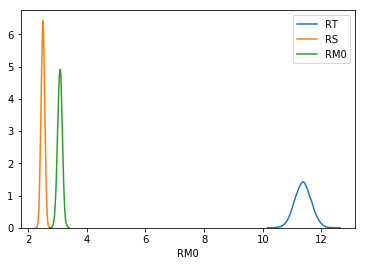

In [6]:
sns.distplot(df['RT'],hist=False,label="RT");
# sns.distplot(df['RL0'],hist=False,label="RL0");
sns.distplot(df['RS'],hist=False,label="RS");
# sns.distplot(df['RS0'],hist=False,label="RS0");
ax=sns.distplot(df['RM0'],hist=False,label="RM0");

<img src="DOE6G_2T.PNG" ALIGN="left" width="400" height="500"> 

,RT,RT0,RLT,RS,RS0,RLS,RL0,RM0,RTL,RSL,TG_R,SG_R,RL,TG_SG_R,STOR
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,11.37,1.20,0.78,2.50,1.00,0.67,0.50,3.08,1.98,1.67,13.35,4.17,3.58,3.18,6.76
std,0.28,0.03,0.02,0.06,0.03,0.02,0.01,0.08,0.04,0.03,0.29,0.07,0.08,0.04,0.09
min,10.31,1.08,0.70,2.29,0.88,0.60,0.44,2.77,1.86,1.52,12.27,3.94,3.26,3.01,6.39
25%,11.18,1.18,0.77,2.46,0.98,0.66,0.49,3.03,1.96,1.65,13.16,4.12,3.53,3.15,6.69
50%,11.37,1.20,0.78,2.50,1.00,0.67,0.50,3.08,1.98,1.67,13.35,4.17,3.58,3.18,6.76
75%,11.56,1.22,0.79,2.54,1.02,0.68,0.51,3.13,2.00,1.69,13.54,4.22,3.63,3.21,6.82
max,12.50,1.30,0.85,2.74,1.10,0.73,0.54,3.36,2.12,1.80,14.49,4.43,3.87,3.33,7.08


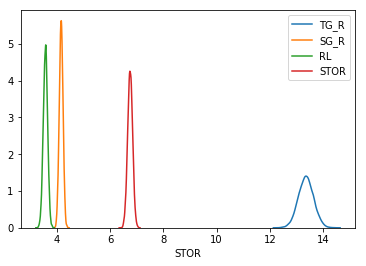

In [9]:
df['RTL']=df['RT0']+df['RLT']
df['RSL']=df['RS0']+df['RLS']

df['TG_R']=df['RT']+df['RTL']
df['SG_R']=df['RS']+df['RSL']
df['RL']=df['RL0']+df['RM0']
ans=np.vectorize(getSTOR)

df['TG_SG_R']=ans(df.TG_R,df.SG_R,df.RL)[0]
df['STOR']=ans(df.TG_R,df.SG_R,df.RL)[1]

sns.distplot(df['TG_R'],hist=False,label="TG_R");
sns.distplot(df['SG_R'],hist=False,label="SG_R");
# sns.distplot(df['TG_SG_R'],hist=False,label="TG_SG_R");
sns.distplot(df['RL'],hist=False,label="RL");
sns.distplot(df['STOR'],hist=False,label="STOR",);

df.describe().round(2)

In [ ]:
# # Io can be calculated based on voltage at RT
# df['V_RTL']=V_RT*df['RTL']/df['RT']



<img src="simpleSTOR.PNG" width=500> 

In [ ]:
# # Calculate T-Slope for SG and TG (deltaT/deltaT)
df['bias_current']=V0/df['TG_SG_R'] 
bias_current_median=df['bias_current'].median()
# df['bias_current']=bias_current_median    #to compare the constant current bias with const volt bias


df['TG_iRatio']=df['SG_R']/(df['TG_R']+df['SG_R'])
df['SG_iRatio']=1-df['TG_iRatio']
df['iTG']=df['bias_current']*df['TG_iRatio']
df['iSG']=df['bias_current']-df['iTG']

df['pwRTG']=(df['iTG']**2)*df['RT']/1000
df['pwRSG']=(df['iSG']**2)*df['RS']/1000

df['dT_RTG']=RT_dTdW*df['pwRTG']
df['dT_RSG']=RS_dTdW*df['pwRSG']
df['dTemp']=df['dT_RTG']+df['dT_RSG']
df['Temp']=df['dTemp']+T0

now=datetime.datetime.now()
month=now.month
day=now.day
second=now.second
df.to_csv(fname + "-{}-{}_{}sec.csv".format(month, day, second))
df.describe()

In [ ]:
df.describe()

In [ ]:
sns.scatterplot(x=df.STOR,y=df.dTemp)

In [ ]:
sns.distplot(df['dTemp'],hist=False,label='dTemp',color='r');
sns.distplot(df['dT_RTG'],hist=False,label="dT RTG");
sns.distplot(df['dT_RSG'],hist=False,label="dT_RSG");
plt.xlabel("Resistance")


df.describe().to_csv('RTG 20%, RSG: 10%, all lead 5%')
df[['STOR','dT_RTG','dT_RSG','dTemp']].describe().round(2)

In [ ]:


sns.distplot(df['RT'],hist=False,label="RTG");
sns.distplot(df['RS'],hist=False,label="RSG");
sns.distplot(df['STOR'],hist=False,label="STOR",);
# plt.xlim(left=4.7, right=6.5)
